## 1. Exploratory Analysis and Feature Selection

The file EDA_FS.ipynb shows the Exploratory analysis and feature selection perfored on the data.


The data has 29 features, which are output of a PCA transformation.
We will perform exploratory analysis and apply feature selection techniques to select 4 features to build the Logistic Regression model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

inputData = pd.read_csv("./creditcard.csv")

X = inputData.iloc[:,0:30]
y = inputData.iloc[:,30]

### Check correlation of all variables with target variable

None of the correlation coefficients are very high.
We select the top 10 factors by correlation for further evaluation

In [2]:
cor = []
colName = []
for i in range(len(X.columns)):
    cor.append(X.iloc[:,i].corr(y))
    colName.append(X.columns[i])
cor_abs = [abs(item) for item in cor]
    
cor_df = pd.DataFrame(list(zip(colName, cor, cor_abs)))
cor_df.columns = ['Feature', 'Correlation', 'abs_cor']
cor_df = cor_df.sort_values(by = ['abs_cor'], ascending = False)
print(cor_df)

   Feature  Correlation   abs_cor
17     V17    -0.326481  0.326481
14     V14    -0.302544  0.302544
12     V12    -0.260593  0.260593
10     V10    -0.216883  0.216883
16     V16    -0.196539  0.196539
3       V3    -0.192961  0.192961
7       V7    -0.187257  0.187257
11     V11     0.154876  0.154876
4       V4     0.133447  0.133447
18     V18    -0.111485  0.111485
1       V1    -0.101347  0.101347
9       V9    -0.097733  0.097733
5       V5    -0.094974  0.094974
2       V2     0.091289  0.091289
6       V6    -0.043643  0.043643
21     V21     0.040413  0.040413
19     V19     0.034783  0.034783
20     V20     0.020090  0.020090
8       V8     0.019875  0.019875
27     V27     0.017580  0.017580
0     Time    -0.012323  0.012323
28     V28     0.009536  0.009536
24     V24    -0.007221  0.007221
29  Amount     0.005632  0.005632
13     V13    -0.004570  0.004570
26     V26     0.004455  0.004455
15     V15    -0.004223  0.004223
25     V25     0.003308  0.003308
23     V23    

In [3]:
X_select = X.loc[:,['V17','V14','V12','V10','V16','V3','V7','V11','V4', 'V18']]

### Significance of features
We perform a independent sample t-test to check which features are significant, i.e., test the null hypothesis that the distribution of the features is significantly difference for the positive and negative class.

In [4]:
from scipy.stats import ttest_ind

ttest_score = []
pval_score = []
colName = []

X_select_pc = X_select.loc[y==1,:]
X_select_nc = X_select.loc[y==0,:]
print(X_select_pc.columns)

for i in range(len(X_select.columns)):
    ttest, pval = ttest_ind(X_select_pc.iloc[:,i], X_select_nc.iloc[:,i])
    ttest_score.append(ttest)
    pval_score.append(pval)
    colName.append(X_select_pc.columns[i])

ttest_df = pd.DataFrame(list(zip(colName, ttest_score, pval_score * 100)))
ttest_df.columns = ('Feature', 'ttest', 'PValue')

print(ttest_df)

Index(['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18'], dtype='object')
  Feature       ttest  PValue
0     V17 -184.334393     0.0
1     V14 -169.397603     0.0
2     V12 -144.047986     0.0
3     V10 -118.566353     0.0
4     V16 -106.973592     0.0
5      V3 -104.950028     0.0
6      V7 -101.733010     0.0
7     V11   83.662148     0.0
8      V4   71.859809     0.0
9     V18  -59.869697     0.0


### Plot features for visual inspection

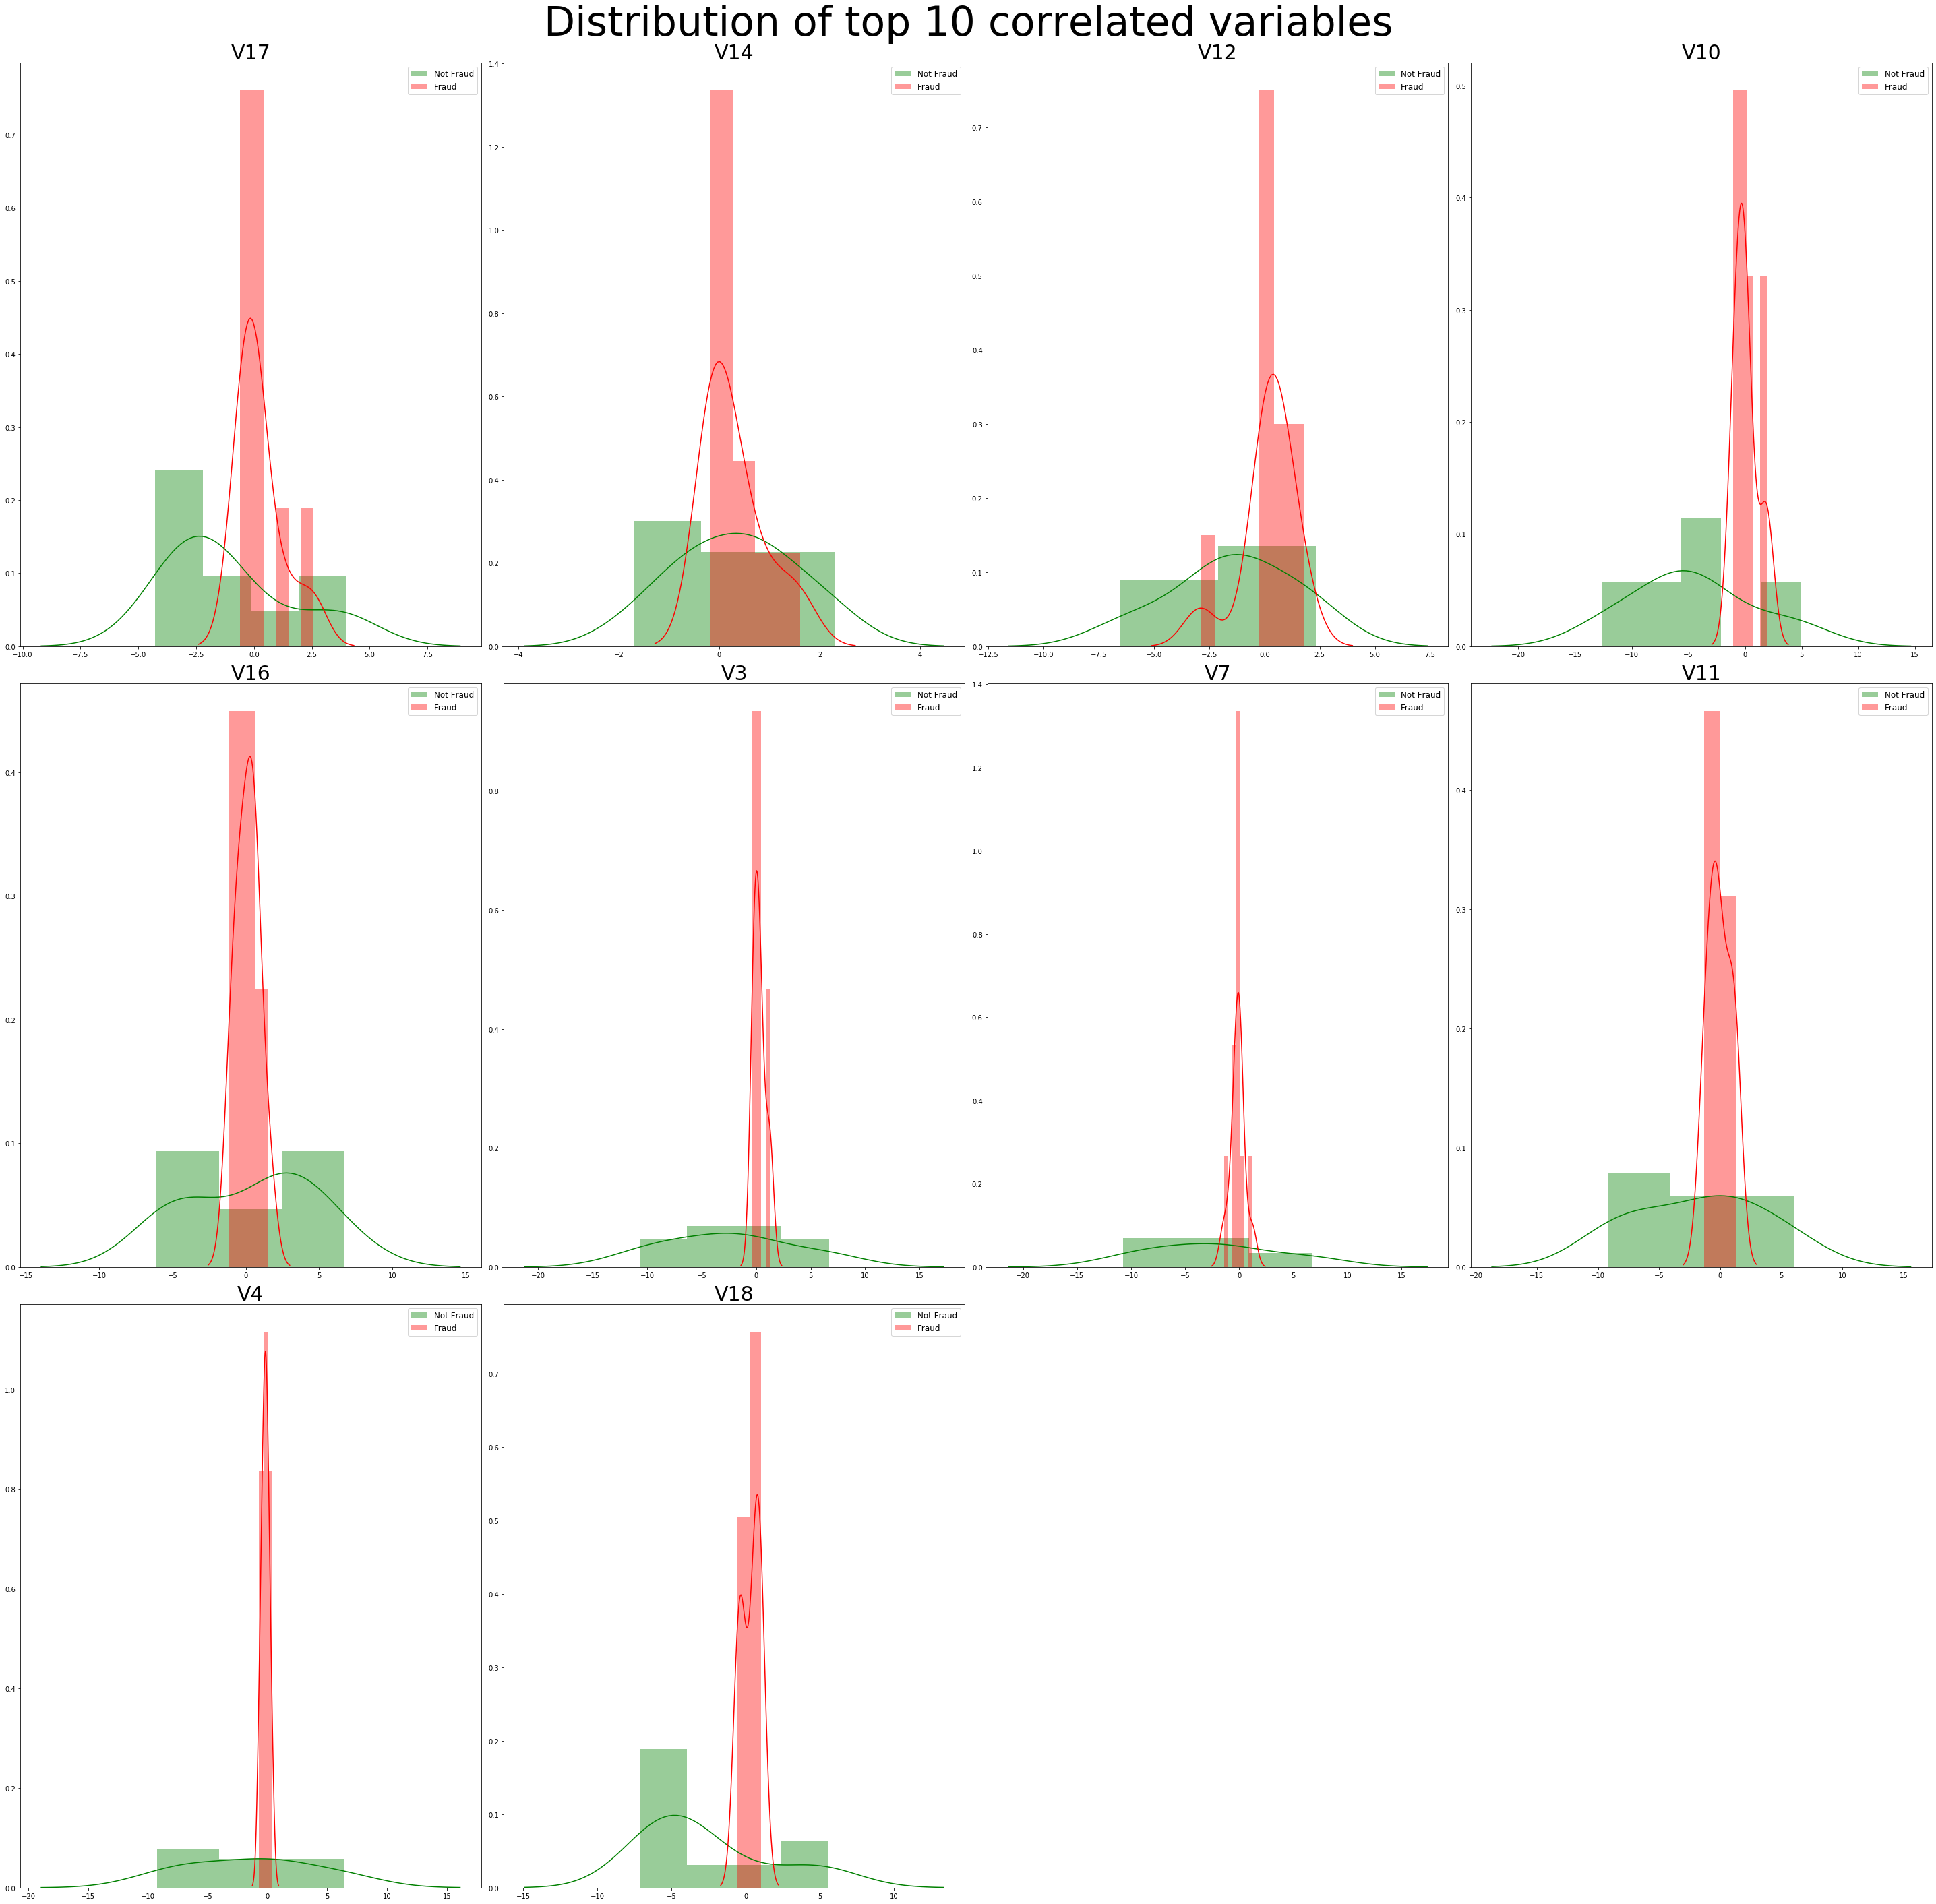

In [5]:
# ! pip install seaborn
import seaborn as sns

X_select_pc = np.array(X_select.loc[y==1,:])
X_select_nc = np.array(X_select.loc[y==0,:])

fig = plt.figure(figsize = (40, 40))
j = 0
for i in range(len(X_select.columns)):
    plt.subplot(3, 4, j+1)
    j += 1
    sns.distplot(X_select_pc[i], color='g', label = 'Not Fraud')
    sns.distplot(X_select_nc[i], color='r', label = 'Fraud')
    plt.legend(loc='best', fontsize = 'large')
    plt.title(X_select.columns[i], fontsize = 30)
fig.suptitle('Distribution of top 10 correlated variables', fontsize = 60)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.savefig('./out/TopFeaturesDistribution.png', dpi = 300)
plt.show()



### RFE and Feature Importance on Top 10
Feature Importance shows no clear winner.
We select features V4, V10, V14 and V16 as per output of RFE

In [6]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
# select top 4 using RFE
rfe = RFE(model, 4)
rfe = rfe.fit(X_select, y)

# print ranking
print(rfe.support_)
print(rfe.ranking_)

from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X_select, y)
# display feature importance
print(model.feature_importances_)

[False  True False  True  True False False False  True False]
[6 1 4 1 1 2 7 3 1 5]


/home/aditya/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.14110148 0.17023175 0.15347129 0.13144574 0.06039953 0.0430522
 0.05641859 0.08921775 0.11522045 0.03944122]
